# Impact of Business Entry Regulations in Countries on Entrepreneurial Activities

### Research Question

How do regulatory barriers to business entry shape countries’ readiness for entrepreneurship, and which regulatory components most strongly constrain the business entry environment?

### Data Source

The analysis is based on the;
1. [B-ready dataset](https://www.worldbank.org/en/businessready/topic/business-entry)
2. [Current classification of countries by income](https://ddh-openapi.worldbank.org/resources/DR0095333/download)

Both these datasets are from The World Bank.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from mesa import Agent, Model
from mesa.space import MultiGrid
import random
import copy

## 1. Exploratory Data Analysis

Understanding cross-country variation in business entry regulations and identifying preliminary patterns between regulatory components and institutional readiness for entrepreneurship.

### 1.1. Identifying the Pillars and the Categories under each Pillar

The first 3 rows of the Excel Sheet contain the **Pillars**, the **Categories** of each Pillar and the **Sub-categories** of each Category.

In [2]:
scores_df = pd.read_excel('01_B-READY-2025-PILLAR-TOPIC-SCORES.xlsx', sheet_name=2, header=None)

# Three Pillars
pillars = scores_df.iloc[0, 3:].unique()
print("Three Pillars:")
print(pillars)

# Categories in each pillar
categories = scores_df.iloc[1, 4:].unique()
print("\nCategories of each Pillar")
print(categories)

# Sub-categories in each pillar
sub_categories = scores_df.iloc[2, 5:].unique()
print("\nSub categories of each Category")
print(sub_categories)

Three Pillars:
['Pillar 1: Quality Of Regulations For Business Entry'
 'Pillar 2: Digital Public Services And Transparency Of Information For Business Entry'
 'Pillar 3: Operational Efficiency Of Business Entry']

Categories of each Pillar
['1.1 Information And Procedural Standards'
 '1.2 Absence Of Restrictions On Registering A Business' nan
 '2.1 Digital Services' '2.2 Interoperability Of Services'
 '2.3 Transparency Of Online Information' '3.1 Domestic Firms'
 '3.2 Foreign Firms']

Sub categories of each Category
['1.1.1 Company Information Filing Requirements'
 '1.1.2 Beneficial Ownershipfiling Requirements'
 '1.1.3 Availability Of Simplified Registration'
 '1.1.4 Risk-Based Assessmentfor Operating Business And Environmental Licenses'
 nan '1.2.1 Domestic Firms' '1.2.2 Foreign Firms'
 '2.1.1 Business Start-Up Process'
 '2.1.2 Storage Of Company And Beneficial Ownership Information'
 '2.1.3 Identity Verification' '2.2.1 Exchange Of Company Information'
 '2.2.2 Unique Business Identi

In [3]:
scores_df = pd.read_excel('01_B-READY-2025-PILLAR-TOPIC-SCORES.xlsx', 
                          sheet_name=2, 
                          skiprows=3)
scores_df.head()

,Economy,Economy Code,Business Entry Overall,Pillar 1 Overall,Category 1.1 Overall,Subcategory 1.1.1 Overall,Mandatory to Have the Company Name Approved,Mandatory to Register Changes to the Company Name,Mandatory to Verify and Document the Identity of Entrepreneurs,Mandatory to Register Shareholders' Information,...,Category 3.1 Overall,Subcategory 3.1.1 Overall,Time to Start a Domestic Firm (from pre- to post-registration),Subcategory 3.1.2 Overall,Cost to Start a Domestic Firm (from pre- to post-registration),Category 3.2 Overall,Subcategory 3.2.1 Overall,Time to Start a Foreign Firm (from pre- to post-registration)​,Subcategory 3.2.2 Overall,Cost to Start a Foreign Firm (from pre- to post-registration)
0,Angola,AGO,74.123870,66.468254,33.333333,10.0,1.428571,1.428571,1.428571,1.428571,...,43.981481,18.981481,18.981481,25.000000,25.000000,44.921875,19.921875,19.921875,25.000000,25.000000
1,Armenia,ARM,95.954186,100.000000,50.000000,10.0,1.428571,1.428571,1.428571,1.428571,...,49.537037,24.537037,24.537037,25.000000,25.000000,48.242188,23.242188,23.242188,25.000000,25.000000
2,Azerbaijan,AZE,86.028853,74.206349,33.333333,10.0,1.428571,1.428571,1.428571,1.428571,...,48.611111,23.611111,23.611111,25.000000,25.000000,48.046875,23.046875,23.046875,25.000000,25.000000
3,Bahrain,BHR,65.344485,64.880952,45.833333,10.0,1.428571,1.428571,1.428571,1.428571,...,22.814001,0.000000,0.000000,22.814001,22.814001,23.171836,0.000000,0.000000,23.171836,23.171836
4,Bangladesh,BGD,63.257276,69.246032,33.333333,10.0,1.428571,1.428571,1.428571,1.428571,...,31.976705,10.879630,10.879630,21.097076,21.097076,31.382425,8.984375,8.984375,22.398050,22.398050


### 1.2. Identifying Countries

In [4]:
scores_df['Economy'].value_counts()

Economy
Angola                1
Pakistan              1
Senegal               1
Samoa                 1
Rwanda                1
                     ..
Eswatini              1
Estonia               1
Equatorial Guinea     1
El Salvador           1
West Bank and Gaza    1
Name: count, Length: 101, dtype: int64

#### Summary

The dataset includes **101 countries** and **18** regulatory indicators related to business entry. These indicators are grouped mainly into 3 Pillars;
- Pillar 1: Quality Of Regulations For Business Entry
- Pillar 2: Digital Public Services And Transparency Of Information For Business Entry
- Pillar 3: Operational Efficiency Of Business Entry

Each Pillar was further categorised into Categories and Sub-categories as below.

**1. Quality Of Regulations For Business Entry**

    1.1. Information And Procedural Standards
        - Company Information Filing Requirements
        - Beneficial Ownership filing Requirements
        - Availability Of Simplified Registration
        - Risk-Based Assessment for Operating Business And Environmental Licenses

    1.2. Absence Of Restrictions On Registering A Business
        - Domestic Firms
        - Foreign Firms

**2. Digital Public Services And Transparency Of Information For Business Entry**

    2.1 Digital Services
        - Business Start-Up Process
        - Storage Of Company And Beneficial Ownership Information
        - Identity Verification

    2.2 Interoperability Of Services
        - Exchange Of Company Information
        - Unique Business Identification
      
    2.3 Transparency Of Online Information
        - Business Start-Up (Includes Gender And Environment)
        - Availability Of General Company Information
        - General And Gender-Disaggregated Firm Statistics

**3. Operational Efficiency Of Business Entry**

    3.1 Domestic Firms
        - Time To Start A Domestic Firm (From Pre- To Post-Registration)
        - Cost To Start A Domestic Firm (From Pre- To Post-Registration)
 
    3.2 Foreign Firms
        - Time To Start A Foreign Firm (From Pre- To Post-Registration)
        - Cost To Start A Foreign Firm (From Pre- To Post-Registration)'

### 1.3. Checking Missing Values

In [5]:
missing_values = scores_df.isna().sum().sum()
print(f"Number of missing values in the dataset: {missing_values}")

Number of missing values in the dataset: 0


### 1.4. Business Entry Overall Column

In [6]:
scores_df['Business Entry Overall'].describe()

count    101.000000
mean      71.743270
std       15.723911
min       32.153282
25%       60.165119
50%       75.224618
75%       84.738437
max       95.954186
Name: Business Entry Overall, dtype: float64

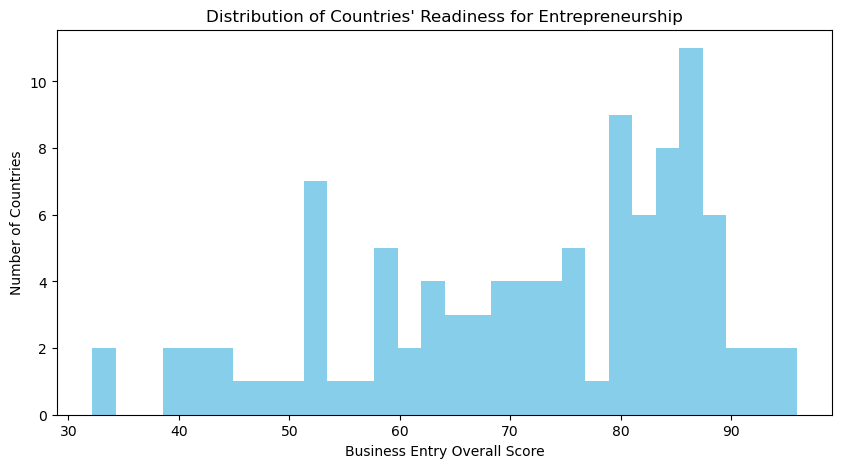

In [7]:
plt.figure(figsize=(10,5))
plt.hist(scores_df['Business Entry Overall'], bins=30, color='skyblue')
plt.xlabel("Business Entry Overall Score")
plt.ylabel("Number of Countries")
plt.title("Distribution of Countries' Readiness for Entrepreneurship")
plt.show()

#### Interpretation

The histogram is left-skewed. This implies that most of the coutries have moderate or high(Between 60 and 90) Business Entry Overall score and fewer number of countries have low scores (less than 60)

### 1.5. Pillar-level Analysis

In [8]:
pillar_overall = [column for column in scores_df.columns if "pillar" in column.lower()]
scores_df[pillar_overall].describe()

,Pillar 1 Overall,Pillar 2 Overall,Pillar 3 Overall
count,101.000000,101.000000,101.000000
mean,77.682304,63.253850,74.293654
std,11.655852,24.003522,20.411792
min,38.769841,3.000000,23.686827
25%,70.198413,45.333333,58.659384
50%,79.444444,71.722222,78.899692
75%,86.031746,83.500000,92.317708
max,100.000000,94.444444,100.000000


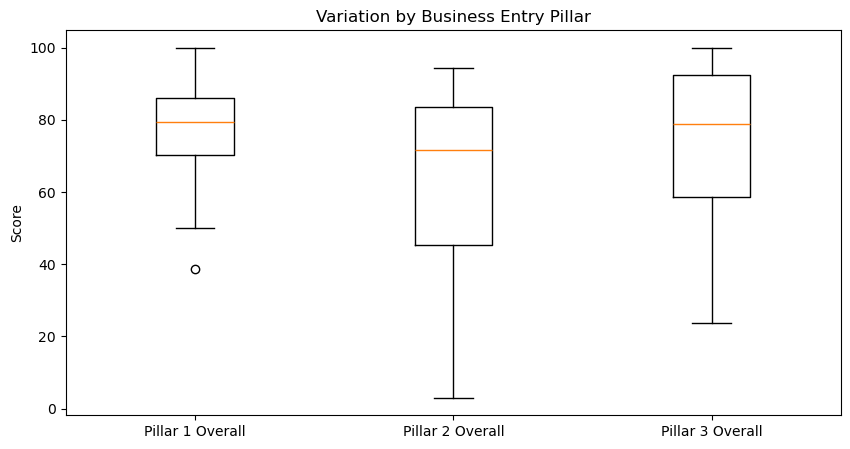

In [9]:
plt.figure(figsize=(10,5))
plt.boxplot([scores_df[column] for column in pillar_overall], tick_labels=pillar_overall)
plt.xticks(rotation=0, ha="center")
plt.ylabel("Score")
plt.title("Variation by Business Entry Pillar")
plt.show()

#### Interpretation

The boxplot of Pillar 1 Overallscore has a relatively tight IQR and its median is around 80. It also has an outlier around 40. This boxplot shows that the performance of Pillar 1 is strong among most countries, suggesting that
- Quality of Regulations for Business Entry is relatively strong globally
- Most countries have implemented supportive baseline regulations
- Pillar 1 is not the primary driver for the variation of the overall score among the countries.

The boxplot of Pillar 2 Overall score has a very wide IQR, and its median is around 70. The lower whisker is long, and it extends almost up to 0.  This boxplot shows that the performance of Pillar 2 has the greatest heterogeneity among countries, suggesting that
- Some countries offer very efficient digital public services and transparency of information in terms of business entry, while others do not.
- Pillar 2 is the main driver for the variation in the overall score among countries and likely the main reason for the low overall scores.

The boxplot of Pillar 3 Overall score has a moderate IQR, and its median is around 80. The lower whisker extends up to nearly 20.  This boxplot shows that the performance of Pillar 3 is high in many countries, but the distribution is not even, suggesting that
- The Operational Efficiency (Cost and time) in terms of business entry is commonly seen in the country, but not evenly distributed.
- Pillar 3 also contributes noticeably to the variation of the overall score among the countries.

### 1.6. Correlation Heatmaps

In [10]:
def correlation_plot(
    correlation_variables,
    title
):
    correlation_df = scores_df[correlation_variables]

    correlation_matrix = correlation_df.corr(method = 'pearson')

    plt.figure(figsize=(12, 6))
    sns.heatmap(
        correlation_matrix,
        annot=True,           
        cmap='coolwarm',      
        fmt=".4f",
        linewidths=0.5,
        vmin=-1,
        vmax=1
    )
    
    plt.title(title)
    plt.tight_layout()
    plt.show()

**1.6.1. Between Pillars and Overall Score**

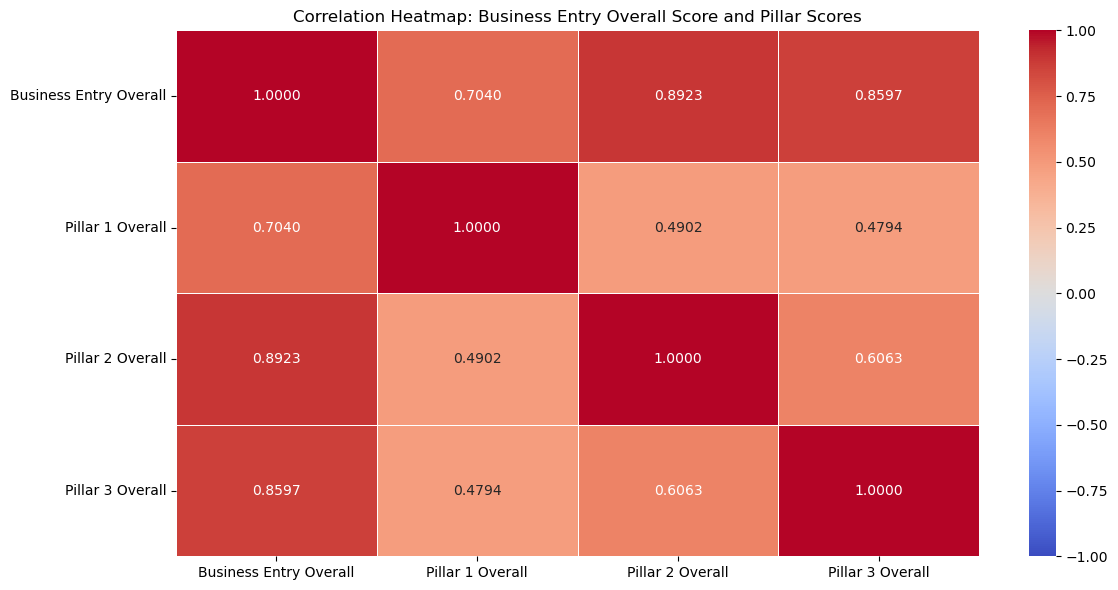

In [11]:
correlation_variables_pillars = [
    'Business Entry Overall',
    'Pillar 1 Overall',
    'Pillar 2 Overall',
    'Pillar 3 Overall'
]
correlation_plot(
    correlation_variables_pillars,
    "Correlation Heatmap: Business Entry Overall Score and Pillar Scores"    
)

#### Interpretation

The Correlation heatmap reveals **positive correlation between the three Pillars and Business Entry Overall(BEO).** Pillar 2 shows the strongest correlation (0.8923) with the BEO, as expected in the Boxplots analysis, while Pillar 3 shows the second-strongest correlation (0.8597) with BEO. Out of the three Pillars, Pillar 1 shows the lowest correlation (0.7040) with BEO. 

**1.6.2. Between Categories of Pillars and Business Entry Overall**

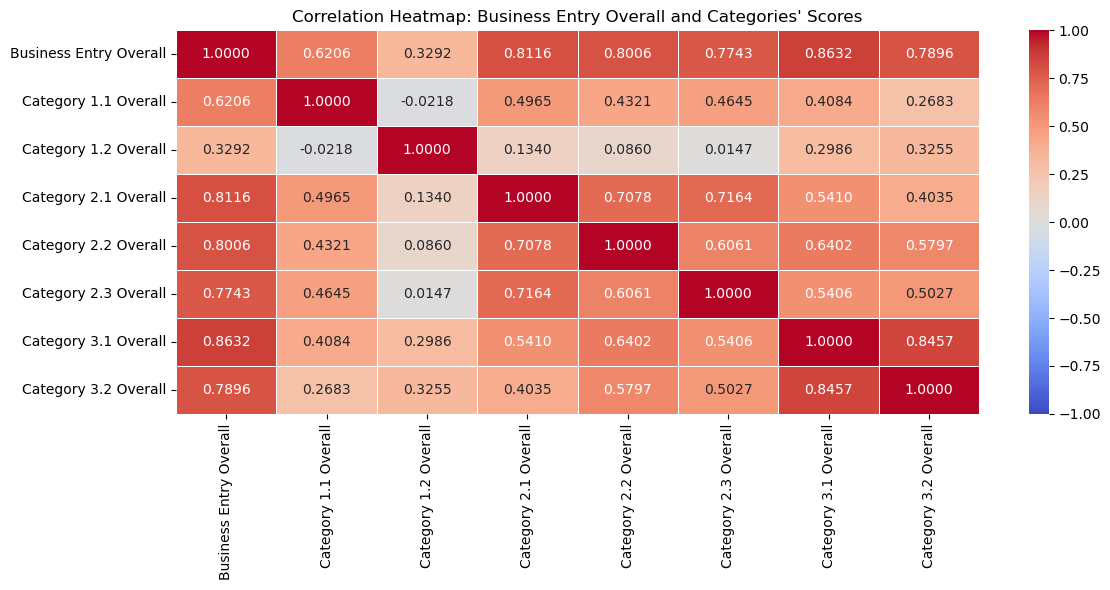

In [12]:
correlation_variables_categories = [
    'Business Entry Overall',
    'Category 1.1 Overall',
    'Category 1.2 Overall',
    'Category 2.1 Overall',
    'Category 2.2 Overall',
    'Category 2.3 Overall',
    'Category 3.1 Overall',
    'Category 3.2 Overall'
]

correlation_plot(
    correlation_variables_categories,
    "Correlation Heatmap: Business Entry Overall and Categories' Scores"    
)

#### Interpretation

The strongest correlation with the BEO is shown by the Category 3.1 (0.8632), followed by Category 2.1 (0.8116), Category 2.2 (0.8006), Category 3.2 (0.7896) and Category 2.3 (0.7743). Also, there is a strong correlation with Category 3.2 and Category 3.1 (0.8457) 

**1.6.3. Between sub categories of Pillars and Business Entry Overall**

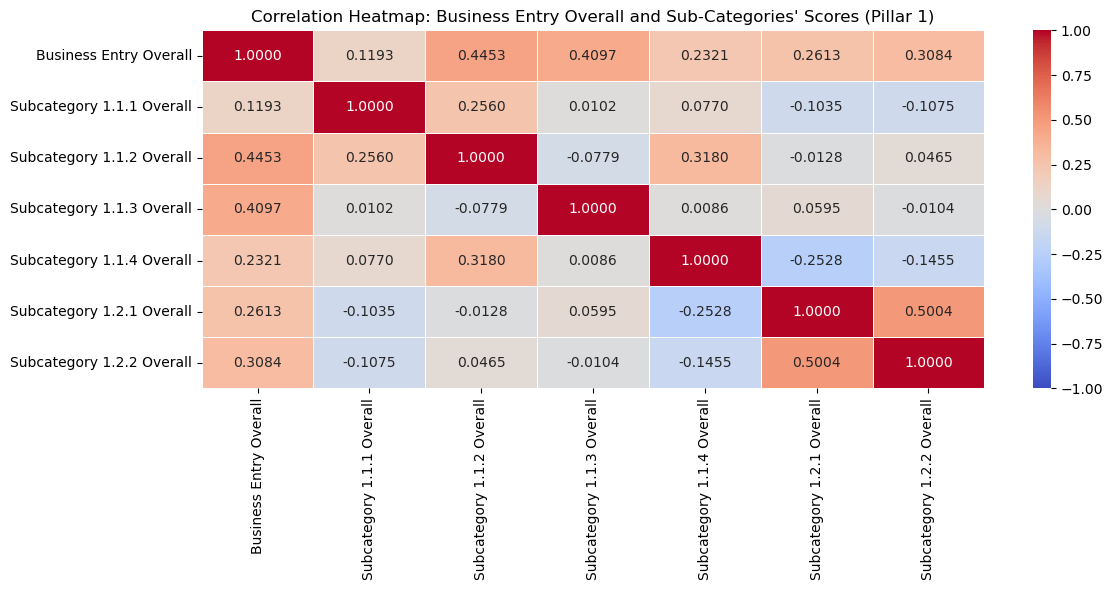

In [13]:
correlation_variables_pillar1sub = [
    'Business Entry Overall',
    'Subcategory 1.1.1 Overall',
    'Subcategory 1.1.2 Overall',
    'Subcategory 1.1.3 Overall',
    'Subcategory 1.1.4 Overall',
    'Subcategory 1.2.1 Overall',
    'Subcategory 1.2.2 Overall',
]
correlation_plot(
    correlation_variables_pillar1sub,
    "Correlation Heatmap: Business Entry Overall and Sub-Categories' Scores (Pillar 1)"    
)

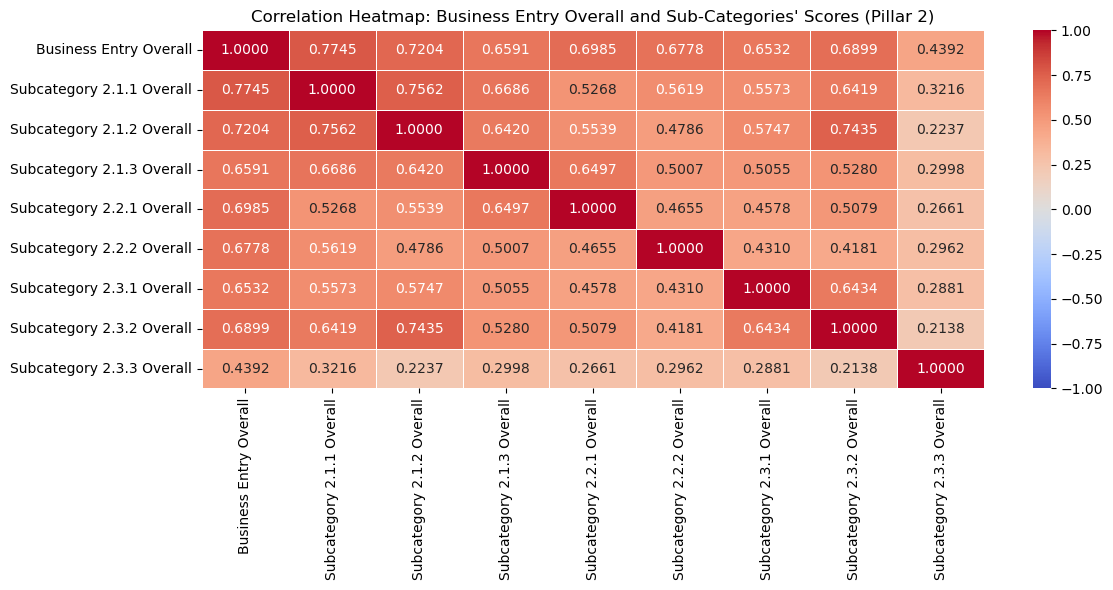

In [14]:
correlation_variables_pillar2sub = [
    'Business Entry Overall',
    'Subcategory 2.1.1 Overall',
    'Subcategory 2.1.2 Overall',
    'Subcategory 2.1.3 Overall',
    'Subcategory 2.2.1 Overall',
    'Subcategory 2.2.2 Overall',
    'Subcategory 2.3.1 Overall',
    'Subcategory 2.3.2 Overall',
    'Subcategory 2.3.3 Overall',
]
correlation_plot(
    correlation_variables_pillar2sub,
    "Correlation Heatmap: Business Entry Overall and Sub-Categories' Scores (Pillar 2)"    
)

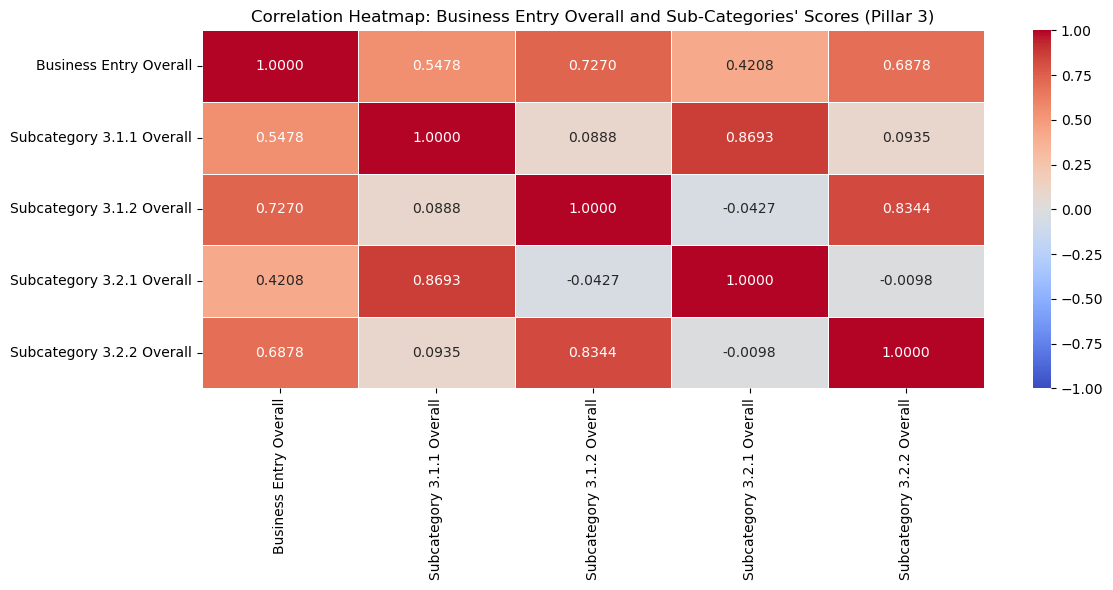

In [15]:
correlation_variables_pillar3sub = [
    'Business Entry Overall',
    'Subcategory 3.1.1 Overall',
    'Subcategory 3.1.2 Overall',
    'Subcategory 3.2.1 Overall',
    'Subcategory 3.2.2 Overall',
]
correlation_plot(
    correlation_variables_pillar3sub,
    "Correlation Heatmap: Business Entry Overall and Sub-Categories' Scores (Pillar 3)"    
)

## 1.7. ABM 

**1.7.1. Using the dataset "World bank grouping of economies".**

World bank grouping of economies.
https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups

In [16]:
economic_groups_df = pd.read_excel('CLASS_2025_10_07.xlsx')
economic_groups_df.head()

,Economy,Code,Region,Income group,Lending category
0,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
1,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
2,Algeria,DZA,"Middle East, North Africa, Afghanistan & Pakistan",Upper middle income,IBRD
3,American Samoa,ASM,East Asia & Pacific,High income,NaN
4,Andorra,AND,Europe & Central Asia,High income,NaN


In [17]:
score_income_group_df = scores_df.merge(
    economic_groups_df[['Code', 'Income group']],
    left_on='Economy Code',
    right_on='Code',
    how='left'
)
score_income_group_df.head()

,Economy,Economy Code,Business Entry Overall,Pillar 1 Overall,Category 1.1 Overall,Subcategory 1.1.1 Overall,Mandatory to Have the Company Name Approved,Mandatory to Register Changes to the Company Name,Mandatory to Verify and Document the Identity of Entrepreneurs,Mandatory to Register Shareholders' Information,...,Time to Start a Domestic Firm (from pre- to post-registration),Subcategory 3.1.2 Overall,Cost to Start a Domestic Firm (from pre- to post-registration),Category 3.2 Overall,Subcategory 3.2.1 Overall,Time to Start a Foreign Firm (from pre- to post-registration)​,Subcategory 3.2.2 Overall,Cost to Start a Foreign Firm (from pre- to post-registration),Code,Income group
0,Angola,AGO,74.123870,66.468254,33.333333,10.0,1.428571,1.428571,1.428571,1.428571,...,18.981481,25.000000,25.000000,44.921875,19.921875,19.921875,25.000000,25.000000,AGO,Lower middle income
1,Armenia,ARM,95.954186,100.000000,50.000000,10.0,1.428571,1.428571,1.428571,1.428571,...,24.537037,25.000000,25.000000,48.242188,23.242188,23.242188,25.000000,25.000000,ARM,Upper middle income
2,Azerbaijan,AZE,86.028853,74.206349,33.333333,10.0,1.428571,1.428571,1.428571,1.428571,...,23.611111,25.000000,25.000000,48.046875,23.046875,23.046875,25.000000,25.000000,AZE,Upper middle income
3,Bahrain,BHR,65.344485,64.880952,45.833333,10.0,1.428571,1.428571,1.428571,1.428571,...,0.000000,22.814001,22.814001,23.171836,0.000000,0.000000,23.171836,23.171836,BHR,High income
4,Bangladesh,BGD,63.257276,69.246032,33.333333,10.0,1.428571,1.428571,1.428571,1.428571,...,10.879630,21.097076,21.097076,31.382425,8.984375,8.984375,22.398050,22.398050,BGD,Lower middle income


In [18]:
score_income_group_df["Income group"].unique()

array(['Lower middle income', 'Upper middle income', 'High income',
       'Low income'], dtype=object)

**1.7.2. Creating Agents(Entrepreneures), Environments(Countries)**

In [19]:
countries = {}

for index,row in score_income_group_df.iterrows():
    countries[row['Economy']] = {
        "Overall" : row['Business Entry Overall'],
        "Pillar1" : row['Pillar 1 Overall'],
        "Pillar2" : row['Pillar 2 Overall'],
        "domestic_time": row['Time to Start a Domestic Firm (from pre- to post-registration)'],  
        "foreign_time": row['Time to Start a Foreign Firm (from pre- to post-registration)​'],    
        "domestic_cost": row['Cost to Start a Domestic Firm (from pre- to post-registration)'],  
        "foreign_cost": row['Cost to Start a Foreign Firm (from pre- to post-registration)'], 
        "startups": 0, 
        "failures": 0,
        "foreign_startups": 0,
        "domestic_startups": 0,
        "foreign_failures": 0,
        "domestic_failures": 0,
        "income_group": row['Income group'],
    }

agents_count = 10000

def create_agents(n, countries):
    agents = []
    for i in range(n):
        agents.append({
            "capital": random.uniform(50,150),
            "skill": random.uniform(0.4,1.0),
            "risk": random.uniform(0.3,0.9),
            "persistence": random.uniform(0.3,0.9),
            "type": random.choice(["domestic","foreign"]),
            "country": random.choice(list(countries.keys())),
            "status": "active"
        })
    return agents

agents = create_agents(agents_count, countries)

In [20]:
def time_factor(agent, country):
    if agent["type"] == "domestic":
        return country["domestic_time"]/100
    else:
        return country["foreign_time"]/100

def cost_factor(agent, country):
    if agent["type"] == "domestic":
        return country["domestic_cost"]/100 
    else:
        return country["foreign_cost"]/100 

**1.7.2. Simulation**

In [21]:
no_of_steps = 10000

def step(agents,countries):
    for agent in agents:
        if agent["status"] != "active":
            continue

        country = countries[agent["country"]]
        
        """
        Some studies show that the quality indices affect the probability of entrepreneurial activities. 
        Therefore, we consider the "Overall score" of each country as the probability that represents how easy it is for
        a new firm to be successful in the given country.
        
        https://doi.org/10.1016/j.jbusres.2025.115291
        """

        # Scoring scheme: https://www.worldbank.org/en/businessready/methodology#tabs-b10aa00388-item-8746b6d51b-tab
        proximity = (country["Pillar1"]+country["Pillar2"])/200

        # Factors that determine the success
        time_fact = time_factor(agent, country)
        cost_fact = cost_factor(agent, country)
        capital_fact = min(1,agent["capital"]/100)
        skill_fact = agent["skill"]

        success_prob = proximity * time_fact * cost_fact * capital_fact * skill_fact

        if random.random() < success_prob:
            if agent["type"] == "foreign":
                agent["status"] = "successful"
                agent["capital"] += 40
                country["foreign_startups"] += 1
                country["startups"] += 1

            else:
                agent["status"] = "successful"
                agent["capital"] += 40
                country["domestic_startups"] += 1
                country["startups"] += 1
            
        else:
            if agent["type"] == "foreign":
                agent["capital"] -= 20
                country["foreign_failures"] += 1
                country["failures"] += 1

            else:
                agent["capital"] -= 20
                country["domestic_failures"] += 1
                country["failures"] += 1

            if random.random() > agent["persistence"]:
                agent["status"] = "exited"

In [22]:
for i in range(no_of_steps):
    step(agents,countries)

In [23]:
simulation_output = []

for country in countries:
    simulation_output.append({
        "Country": country,
        "Overall": countries[country]["Overall"],
        "Startups": countries[country]["startups"],
        "Failures": countries[country]["failures"],
        "Income group": countries[country]["income_group"],
    })

simulation_output_df = pd.DataFrame(simulation_output)
simulation_output_df.head()

,Country,Overall,Startups,Failures,Income group
0,Angola,74.123870,4,225,Lower middle income
1,Armenia,95.954186,3,306,Upper middle income
2,Azerbaijan,86.028853,4,305,Upper middle income
3,Bahrain,65.344485,0,331,High income
4,Bangladesh,63.257276,2,287,Lower middle income


**1.7.3. Number of Startups and Failures in each Income Group** 

In [24]:
group_counts = (
    simulation_output_df
    .groupby("Income group")
    .agg(
        avg_overall=("Overall", "mean"),
        total_startups=("Startups", "sum"),
        total_failures=("Failures", "sum"),
        countries=("Country", "count")
    )
    .reset_index()
)

group_counts

,Income group,avg_overall,total_startups,total_failures,countries
0,High income,80.241141,123,10789,35
1,Low income,55.473089,15,3410,11
2,Lower middle income,67.000749,84,8982,29
3,Upper middle income,72.477100,76,7911,26


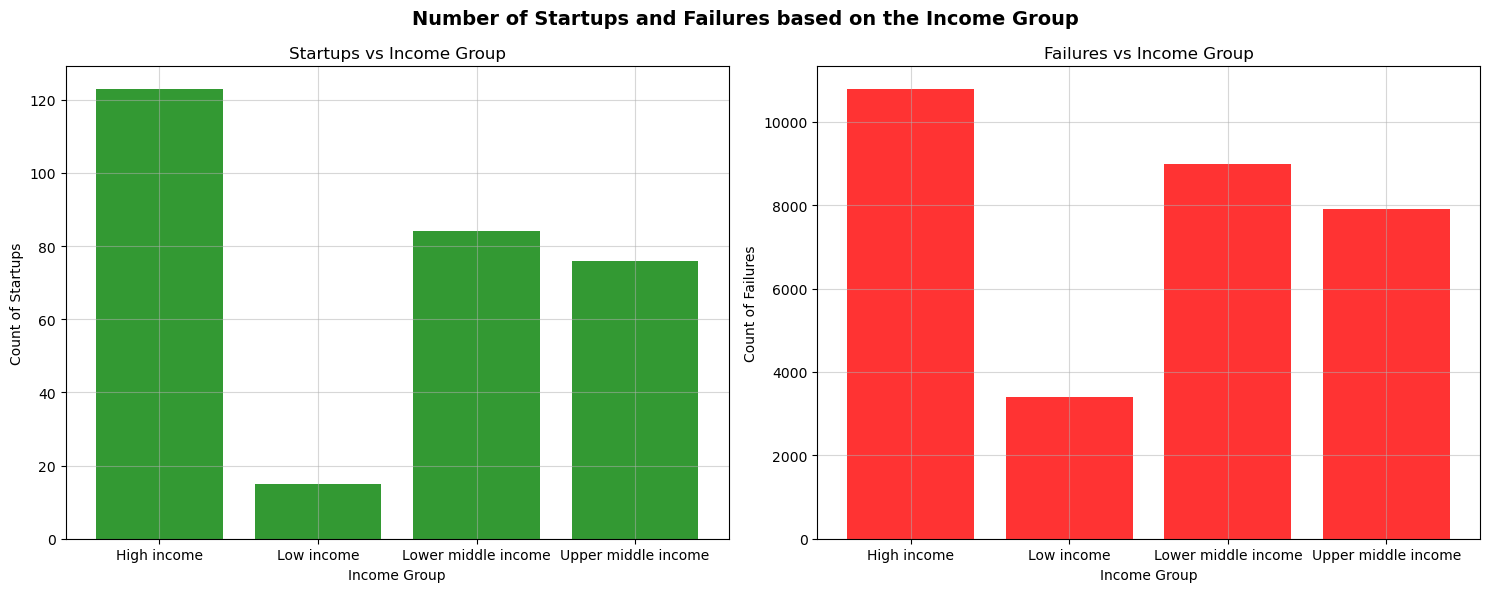

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(
    'Number of Startups and Failures based on the Income Group',
    fontsize=14,
    fontweight='bold'    
)

# Startups plot
axes[0].bar(group_counts["Income group"],
            group_counts["total_startups"], 
            color='green',
            alpha=0.8)
axes[0].set_xlabel("Income Group")
axes[0].set_ylabel("Count of Startups")
axes[0].set_title("Startups vs Income Group")
axes[0].grid(True, alpha=0.5)

# Failures plot
axes[1].bar(group_counts["Income group"],
            group_counts["total_failures"], 
            color='red',
            alpha=0.8)
axes[1].set_xlabel("Income Group")
axes[1].set_ylabel("Count of Failures")
axes[1].set_title("Failures vs Income Group")
axes[1].grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

**1.7.3. Identifying Patterns**

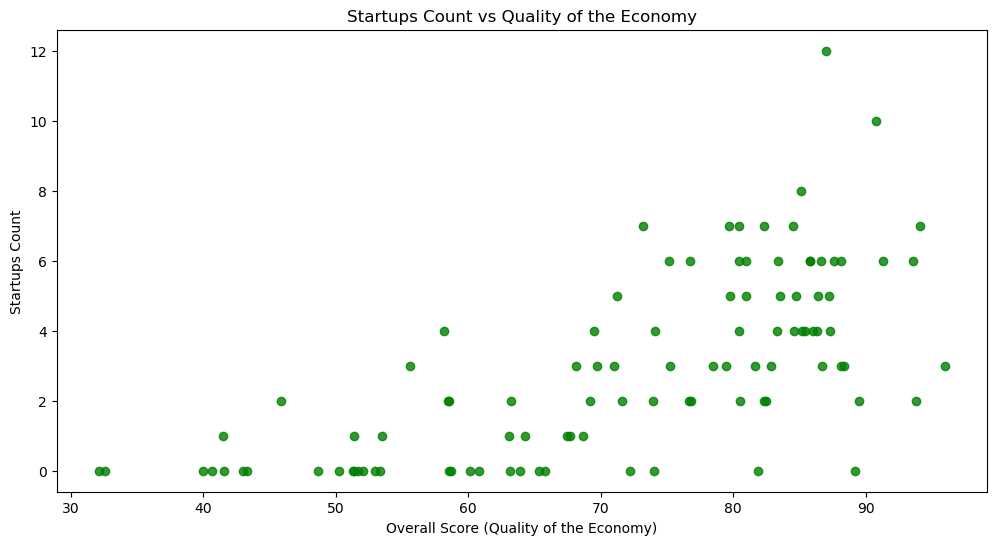

In [26]:
plt.figure(figsize=(12,6))

plt.scatter(simulation_output_df["Overall"],
            simulation_output_df["Startups"],
            color='green',
            alpha=0.8
           )
plt.xlabel("Overall Score (Quality of the Economy)")
plt.ylabel("Startups Count")
plt.title("Startups Count vs Quality of the Economy")
plt.show()

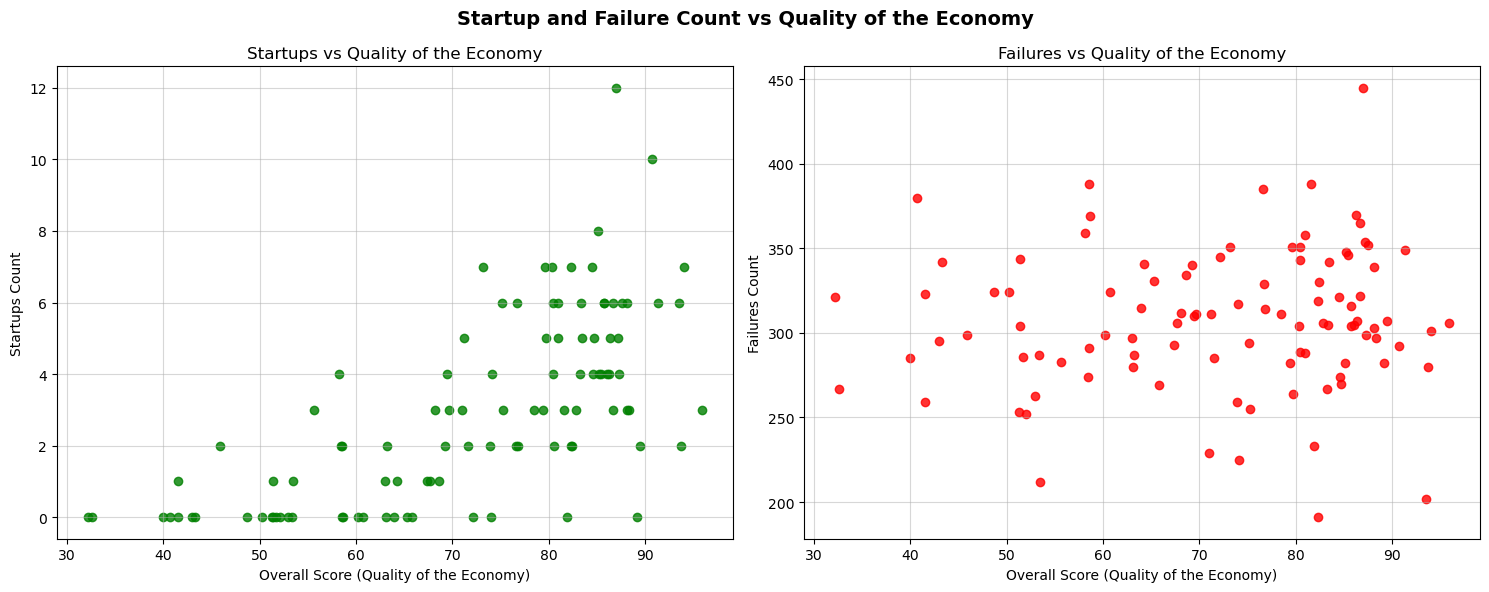

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(
    'Startup and Failure Count vs Quality of the Economy',
    fontsize=14,
    fontweight='bold'    
)

# Startups plot
axes[0].scatter(simulation_output_df["Overall"],
                simulation_output_df["Startups"], 
                color='green',
                alpha=0.8)
axes[0].set_xlabel("Overall Score (Quality of the Economy)")
axes[0].set_ylabel("Startups Count")
axes[0].set_title("Startups vs Quality of the Economy")
axes[0].grid(True, alpha=0.5)

# Failures plot
axes[1].scatter(simulation_output_df["Overall"],
                simulation_output_df["Failures"], 
                color='red',
                alpha=0.8)
axes[1].set_xlabel("Overall Score (Quality of the Economy)")
axes[1].set_ylabel("Failures Count")
axes[1].set_title("Failures vs Quality of the Economy")
axes[1].grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

**Plot 1: Startups vs Economic Quality**

Pattern: As the Overall Score increases (from 30 to 90), the number of startups increases (from 0 to 10+)

Interpretation:

- Clear positive correlation - Better economic quality leads to more successful startups
- In countries with poor business environments (score ~30), there are almost no startups
- In countries with excellent business environments (score ~90), startups count is high

This suggests that Economical quality significantly enables entrepreneurial success

**Plot 2: Failure vs Economic Quality**

Pattern: There is no clear correlation between economic quality and failures

- Failures occur at similar rates regardless of the economical quality

**1.7.3. Checking whether the pattern exist in every income group**

In [28]:
income_groups = [
        'Low income',
        'Lower middle income',
        'Upper middle income',
        'High income'
    ]

def plot_incomegroups(
    title,
    column_name,
    colour,
    y_axis
):

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    fig.suptitle(
        title, 
        fontsize=14,
        fontweight='bold',
    )

    for i, group in enumerate(income_groups):
        ax = axes[i]

        group_df = simulation_output_df[simulation_output_df["Income group"] == group]

        ax.scatter(
            group_df["Overall"],
            group_df[column_name],
            color=colour
        )

        ax.set_title(group)
        ax.set_xlabel("Overall Score (Quality of the Economy)")
        ax.set_ylabel(y_axis)

    plt.tight_layout()
    plt.show()

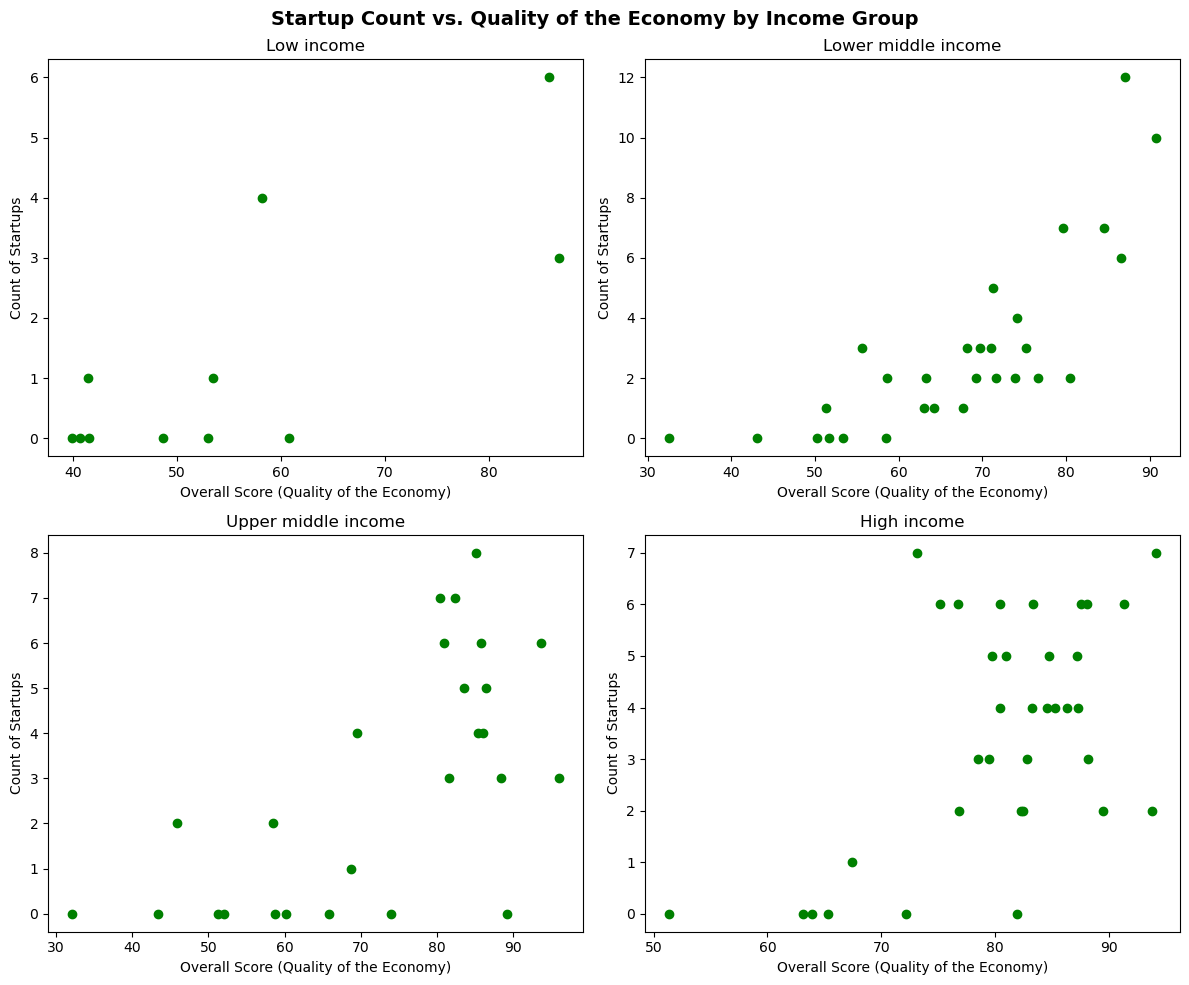

In [29]:
#Startup Count vs. Quality of the Economy by Income Group
plot_incomegroups(
    "Startup Count vs. Quality of the Economy by Income Group",
    "Startups",
    'green',
    "Count of Startups"
)

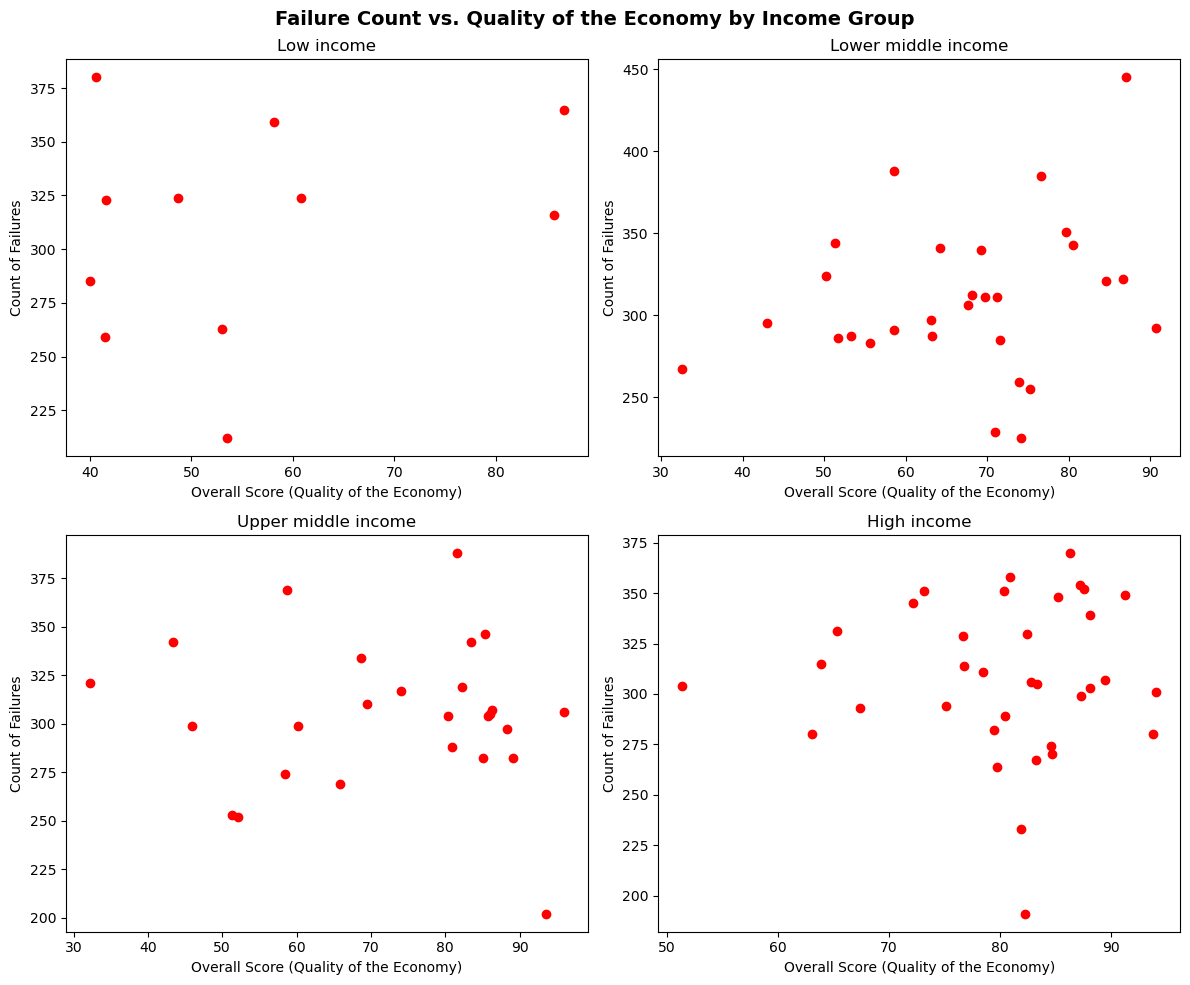

In [30]:
#Failure Count vs. Quality of the Economy by Income Group
plot_incomegroups(
    "Failure Count vs. Quality of the Economy by Income Group",
    "Failures",
    'red',
    "Count of Failures"
)

## 1.8. Applyig Changes to Pillar2 and Pillar3 Scores

In [31]:
score_changes = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

**1.8.1. Applyig changes to Pillar 2 Scores**

In [34]:
def apply_pillar2_changes(countries, score_changes):
    score_changed_countries = copy.deepcopy(countries)

    for country in score_changed_countries.values():
        country["Pillar2"] = min(100, country["Pillar2"] * (1 + change))
        country["startups"] = 0
        country["failures"] = 0
        country["foreign_startups"] = 0
        country["domestic_startups"] = 0
        country["foreign_failures"] = 0
        country["domestic_failures"] = 0

    return score_changed_countries

In [35]:
P2score_changed_results = []

for change in score_changes:
    P2score_changed_countries = apply_pillar2_changes(countries, change)
    agents = create_agents(agents_count, P2score_changed_countries)

    for i in range(no_of_steps):
        step(agents, P2score_changed_countries)

    for country_name, country_data in P2score_changed_countries.items():
        P2score_changed_results.append({
            "Country": country_name,
            "Income group": country_data["income_group"],
            "Pillar2_change": int(change * 100),
            "Startups": country_data["startups"],
            "Failures": country_data["failures"]
        })

In [36]:
P2score_changed_results_df = pd.DataFrame(P2score_changed_results)
P2score_changed_results_df

,Country,Income group,Pillar2_change,Startups,Failures
0,Angola,Lower middle income,0,6,218
1,Armenia,Upper middle income,0,2,253
2,Azerbaijan,Upper middle income,0,7,306
3,Bahrain,High income,0,0,372
4,Bangladesh,Lower middle income,0,1,328
...,...,...,...,...,...
1005,Uruguay,High income,90,0,244
1006,Uzbekistan,Lower middle income,90,2,383
1007,Vanuatu,Lower middle income,90,2,264
1008,Viet Nam,Lower middle income,90,0,307


In [37]:
p2_grouped_df = (
    P2score_changed_results_df.groupby(["Income group", "Pillar2_change"])[["Startups", "Failures"]]
    .mean()
    .reset_index()
)
p2_grouped_df

,Income group,Pillar2_change,Startups,Failures
0,High income,0,3.714286,317.028571
1,High income,10,3.457143,306.600000
2,High income,20,3.828571,304.771429
3,High income,30,3.828571,313.228571
4,High income,40,3.514286,304.000000
5,High income,50,4.114286,309.000000
6,High income,60,4.914286,298.000000
7,High income,70,4.085714,290.800000
8,High income,80,3.942857,307.771429
9,High income,90,4.400000,297.285714


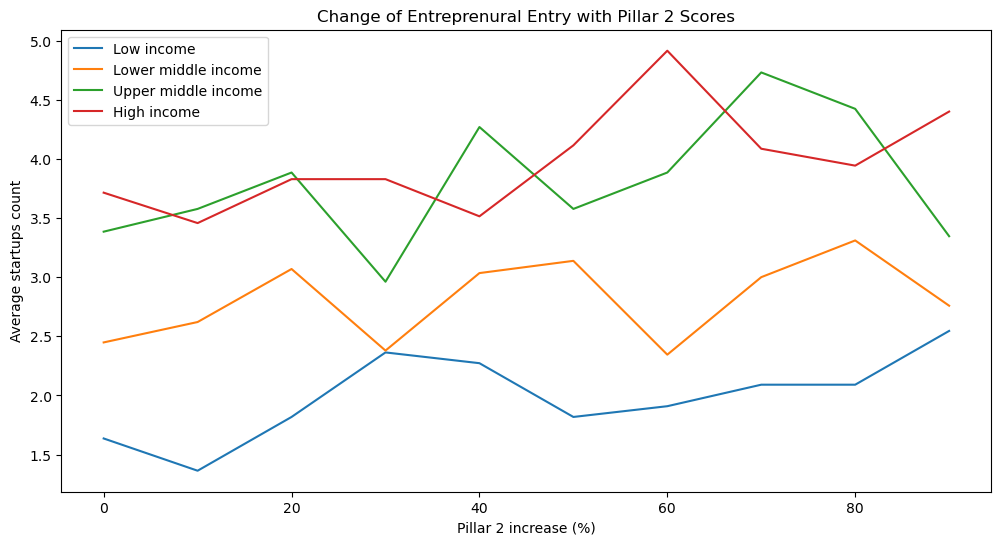

In [38]:
plt.figure(figsize=(12,6))

for group in income_groups:
    gdf = p2_grouped_df[p2_grouped_df["Income group"] == group]
    plt.plot(gdf["Pillar2_change"], gdf["Startups"], label=group)

plt.xlabel("Pillar 2 increase (%)")
plt.ylabel("Average startups count")
plt.legend()
plt.title("Change of Entreprenural Entry with Pillar 2 Scores")
plt.show()

**1.8.2. Applying Changes to Pillar 3 Scores**

In [39]:
def apply_factor_change(countries,
                 change,
                 domestic_column,
                 foreign_column
):
    changed_countries = copy.deepcopy(countries)
    
    for country in changed_countries.values():
        country[domestic_column] = min(100, country[domestic_column] * (1 + change))
        country[foreign_column] = min(100, country[foreign_column] * (1 + change))
        country["startups"] = 0
        country["failures"] = 0
        country["foreign_startups"] = 0
        country["domestic_startups"] = 0
        country["foreign_failures"] = 0
        country["domestic_failures"] = 0
        
    return changed_countries

In [40]:
def p3score_change(
    domestic_column,
    foreign_column
):
    changed_results = []
    
    for change in score_changes:
        changed_countries = apply_factor_change(
            countries,
            change,
            domestic_column,
            foreign_column
        )
        agents = create_agents(agents_count, changed_countries)

        for i in range(no_of_steps):
            step(agents, changed_countries)

        for country_name, country_data in changed_countries.items():
            changed_results.append({
                "Country": country_name,
                "Income group": country_data["income_group"],
                "Changed_percentage": int(change * 100),
                "Avg_score": (country_data[domestic_column] + country_data[foreign_column]) / 2,
                "Startups": country_data["startups"],
                "Failures": country_data["failures"],
                "Foreign Startups": country_data["foreign_startups"],
                "Domestic Startups": country_data["domestic_startups"],
                "Foreign Failures": country_data["foreign_failures"],
                "Domestic Failures": country_data["domestic_failures"],
            })
    return changed_results

In [41]:
def draw_plots(
    results_df,
    title
):
    grouped = (
        results_df.groupby(["Income group", "Changed_percentage"])
        .mean(numeric_only = True)
        .reset_index()
    )

    plt.figure(figsize = (12,6))

    for group in income_groups:
        gdf = grouped[grouped["Income group"] == group]
        plt.plot(gdf["Changed_percentage"], gdf["Startups"], label=group)

    plt.xlabel("Change(%)")
    plt.ylabel("Average startups count")
    plt.legend()
    plt.title(title)
    plt.show()

In [42]:
def plot_by_status(
    results_df,
    supertitle
):
    grouped = (
        results_df.groupby(["Income group", "Changed_percentage"])
        .mean(numeric_only = True)
        .reset_index()
    )
    
    plots = [
        "Domestic Startups",
        "Foreign Startups",
        "Domestic Failures",
        "Foreign Failures",
    ]
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    fig.suptitle(
        supertitle, 
        fontsize=14,
        fontweight='bold',
    )

    for i, plot in enumerate(plots):
        ax = axes[i]

        for group in income_groups:
            gdf = grouped[grouped["Income group"] == group]

            ax.plot(
                gdf["Changed_percentage"],
                gdf[plot],
                marker="o",
                label=group
            )

        ax.set_title(plot)
        ax.set_xlabel("Change (%)")
        ax.set_ylabel("Average count")
        ax.legend()

    plt.tight_layout()
    plt.show()

**1.8.2.1 Applying Changes to Processing-time**

In [43]:
time_changed_results = p3score_change(
    "domestic_time",
    "foreign_time"
) 
time_changed_results_df = pd.DataFrame(time_changed_results)
time_changed_results_df

,Country,Income group,Changed_percentage,Avg_score,Startups,Failures,Foreign Startups,Domestic Startups,Foreign Failures,Domestic Failures
0,Angola,Lower middle income,0,19.451678,5,372,2,3,234,138
1,Armenia,Upper middle income,0,23.889612,9,317,2,7,178,139
2,Azerbaijan,Upper middle income,0,23.328993,7,348,0,7,156,192
3,Bahrain,High income,0,0.000000,0,308,0,0,176,132
4,Bangladesh,Lower middle income,0,9.932002,1,355,1,0,197,158
...,...,...,...,...,...,...,...,...,...,...
1005,Uruguay,High income,90,0.000000,0,290,0,0,104,186
1006,Uzbekistan,Lower middle income,90,43.466073,10,310,5,5,177,133
1007,Vanuatu,Lower middle income,90,24.794560,2,277,0,2,130,147
1008,Viet Nam,Lower middle income,90,36.023582,11,361,6,5,200,161


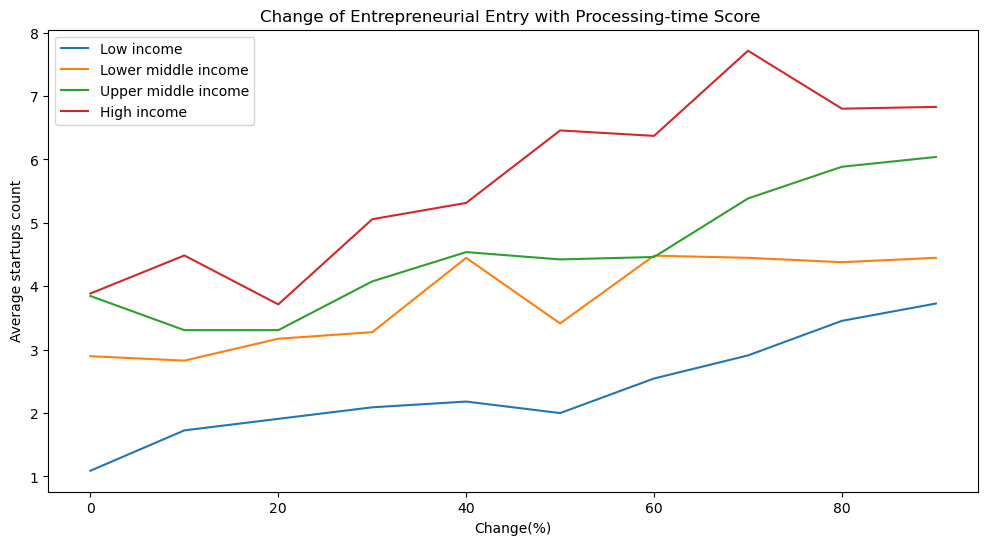

In [44]:
draw_plots(
    time_changed_results_df,
    "Change of Entrepreneurial Entry with Processing-time Score "
)

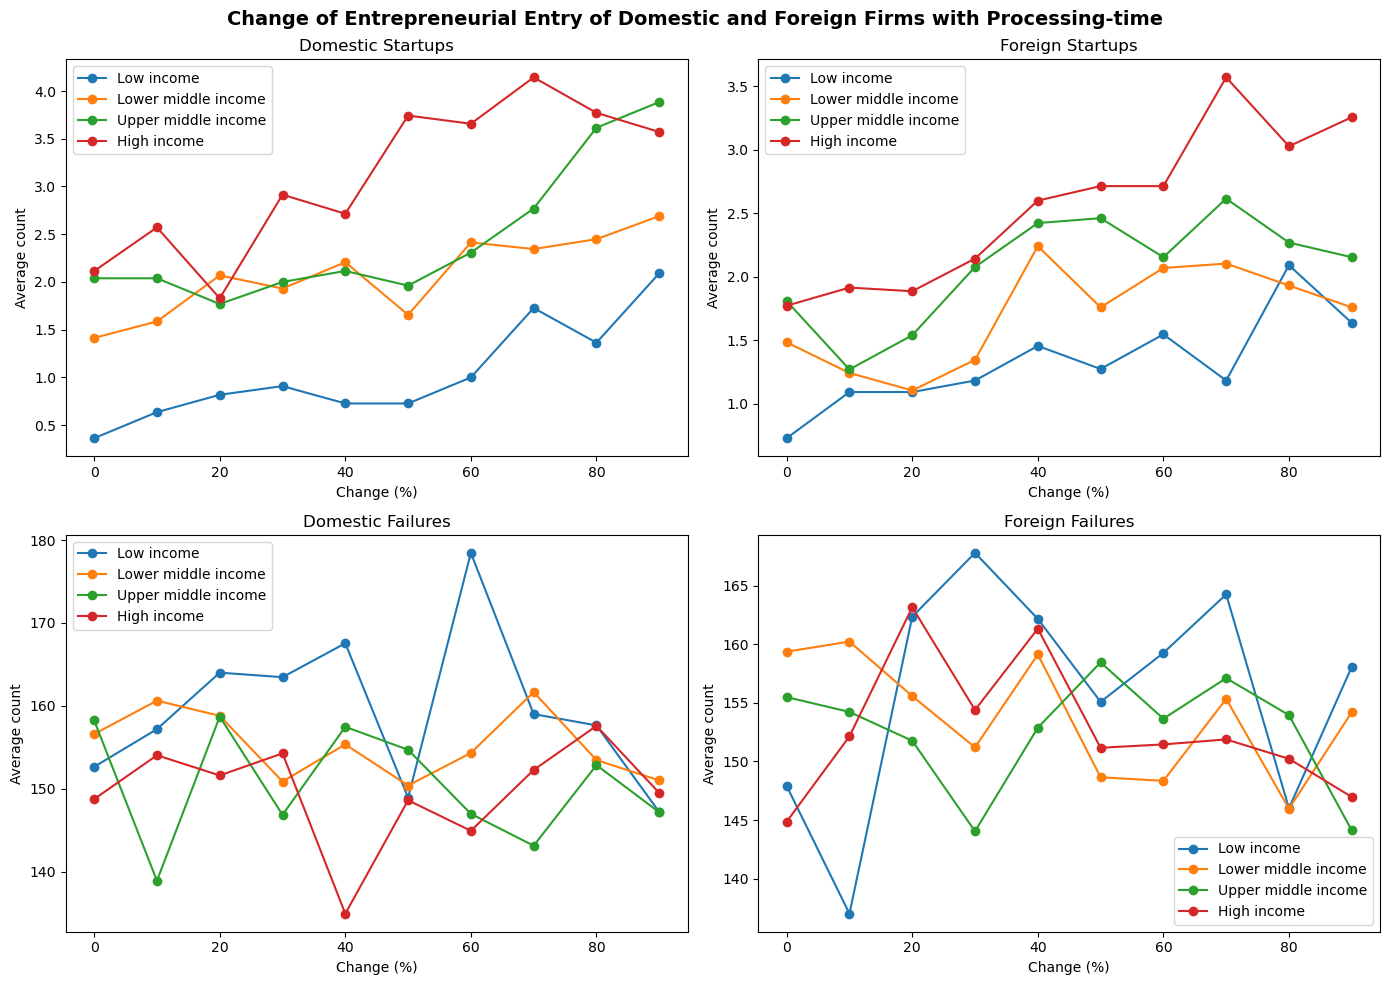

In [46]:
plot_by_status(
    time_changed_results_df,
    "Change of Entrepreneurial Entry of Domestic and Foreign Firms with Processing-time"
)

**1.8.2.2. Applying Changes to Processing Cost**

In [47]:
cost_changed_results = p3score_change(
    "domestic_cost",
    "foreign_cost"
) 
cost_changed_results_df = pd.DataFrame(cost_changed_results)
cost_changed_results_df

,Country,Income group,Changed_percentage,Avg_score,Startups,Failures,Foreign Startups,Domestic Startups,Foreign Failures,Domestic Failures
0,Angola,Lower middle income,0,25.000000,4,369,2,2,234,135
1,Armenia,Upper middle income,0,25.000000,8,362,2,6,204,158
2,Azerbaijan,Upper middle income,0,25.000000,2,432,1,1,247,185
3,Bahrain,High income,0,22.992918,0,361,0,0,141,220
4,Bangladesh,Lower middle income,0,21.747563,0,301,0,0,126,175
...,...,...,...,...,...,...,...,...,...,...
1005,Uruguay,High income,90,28.520857,0,309,0,0,152,157
1006,Uzbekistan,Lower middle income,90,47.347282,8,271,4,4,118,153
1007,Vanuatu,Lower middle income,90,28.196750,2,312,2,0,143,169
1008,Viet Nam,Lower middle income,90,47.500000,6,423,3,3,167,256


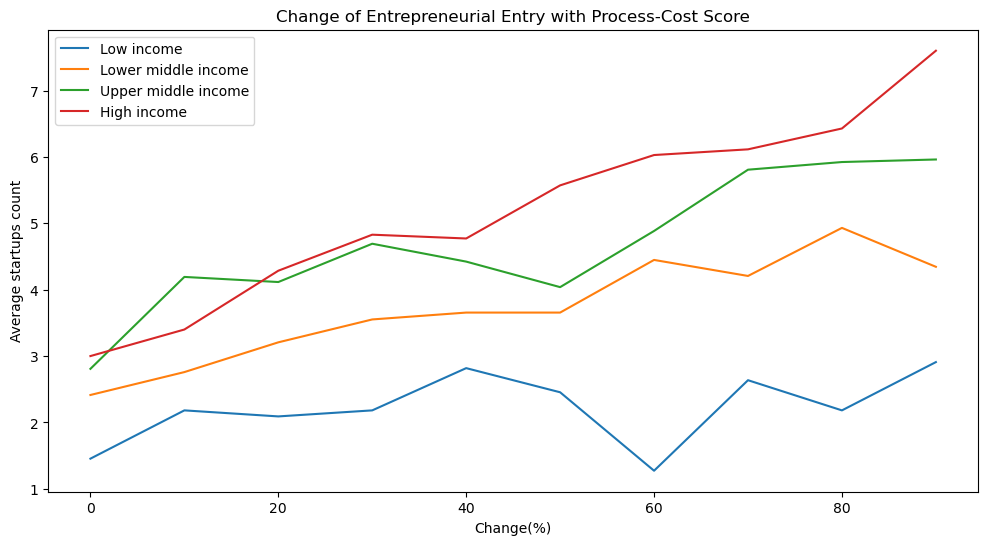

In [48]:
draw_plots(
    cost_changed_results_df,
    "Change of Entrepreneurial Entry with Process-Cost Score"
)

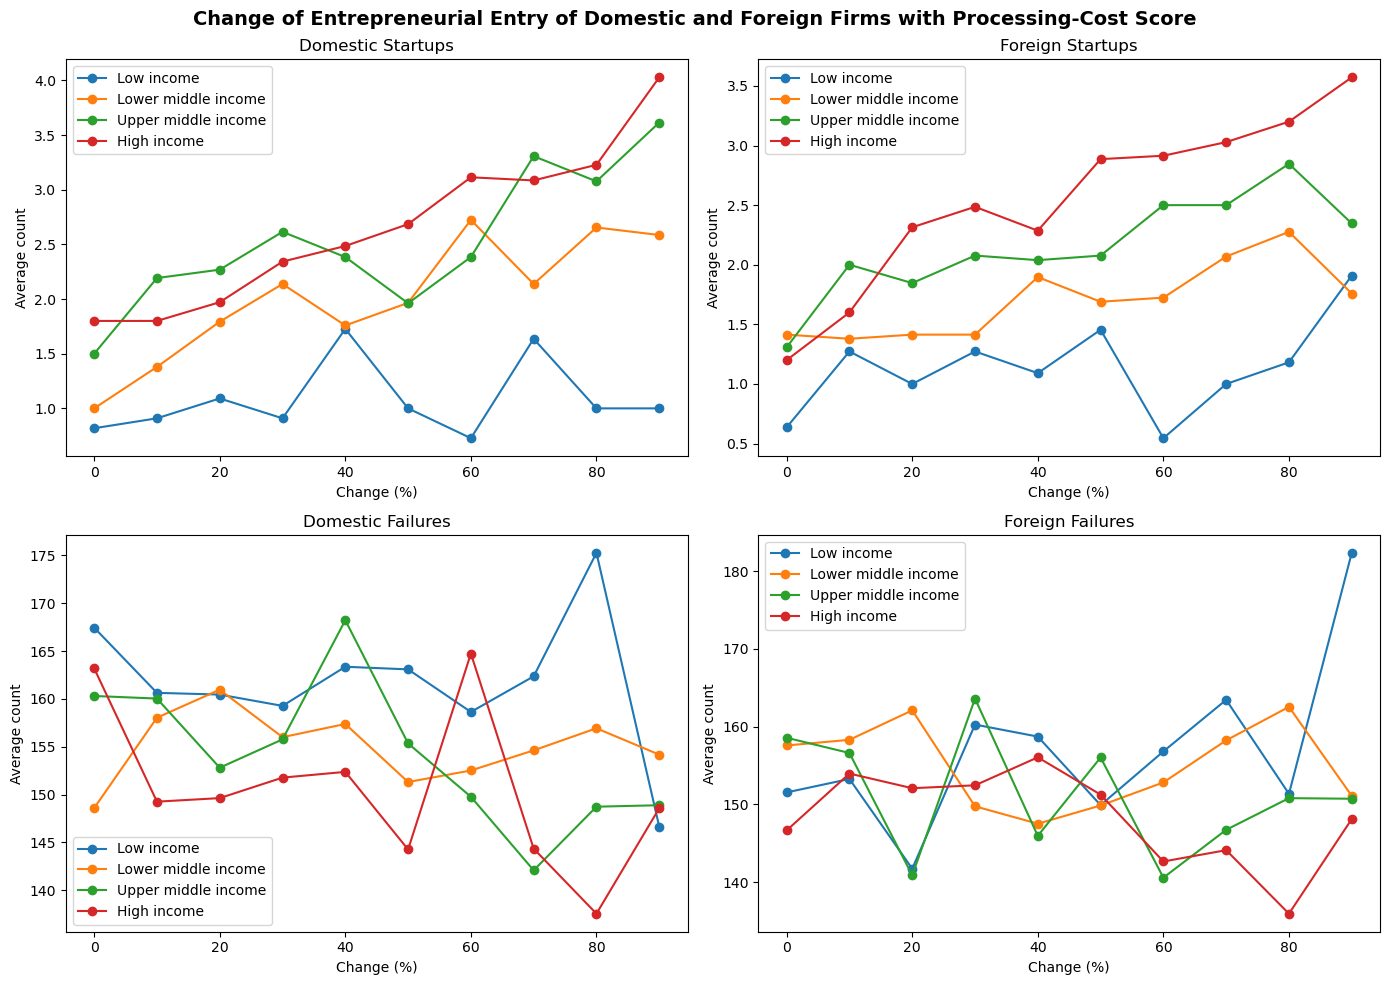

In [51]:
plot_by_status(
    cost_changed_results_df,
    "Change of Entrepreneurial Entry of Domestic and Foreign Firms with Processing-Cost Score"
)

## References

- Methodology | Business ready. (n.d.). World Bank. https://www.worldbank.org/en/businessready/methodology#tabs-b10aa00388-item-8746b6d51b-tab
- Gaies, B., Vesci, M., Crudele, C., Calabrò, A., & Maalaoui, A. (2025). How does institutional quality influence opportunity entrepreneurship? A panel data analysis of OECD countries. Journal of Business Research, 192, 115291. https://doi.org/10.1016/j.jbusres.2025.115291
- Brockhaus, Robert H., The Psychology of the Entrepreneur (1982). University of Illinois at Urbana-Champaign's Academy for Entrepreneurial Leadership Historical Research Reference in Entrepreneurship, Available at SSRN: https://ssrn.com/abstract=1497760
- Littunen, H. (2000). Entrepreneurship and the characteristics of the entrepreneurial personality. International Journal of Entrepreneurial Behaviour & Research, 6(6), 295–310. https://doi.org/10.1108/13552550010362741
- Scheiner, C.W. (2009). Fundamental Determinants of Entrepreneurial Behaviour. In: Fundamental Determinants of Entrepreneurial Behaviour. Gabler. https://doi.org/10.1007/978-3-8349-8327-5_2
- Klapper, L., Laeven, L., & Rajan, R. (2006). Entry regulation as a barrier to entrepreneurship. Journal of Financial Economics, 82(3), 591–629. https://doi.org/10.1016/j.jfineco.2005.09.006
- pandas.DataFrame.corr — pandas 2.3.3 documentation. (n.d.). https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- Python Shallow Copy and Deep Copy (With examples). (n.d.). https://www.programiz.com/python-programming/shallow-deep-copy
- Stojiljković, M. (2023). NumPy, SciPy, and pandas: Correlation With Python. https://realpython.com/numpy-scipy-pandas-correlation-python/
- Omar Kammouh - educational content and more. (2025). Introduction to Agent-Based Modelling (ABM) using the Mesa library in Python (2025) [Video]. YouTube. https://www.youtube.com/watch?v=BFPzuG_XXFo
- ter Hoeven, E., Kwakkel, J., Hess, V., Pike, T., Wang, B., rht, & Kazil, J. (2025). Mesa 3: Agent-based modeling with Python in 2025. Journal of Open Source Software, 10(107), 7668. https://doi.org/10.21105/joss.07668